In [16]:
# Creditworthiness Prediction Project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load your dataset
data = pd.read_csv('credit_data.csv')  # Placeholder file name

In [18]:
# Inspect the dataset
print(data.head())
print(data.info())

   income   debt  payment_history  credit_score  employment_length  \
0   50000  10000             0.90           700                  5   
1   60000   5000             0.95           750                  6   
2   35000  15000             0.60           580                  2   
3   45000   8000             0.70           620                  3   
4   80000   3000             0.98           790                 10   

   creditworthy  
0             1  
1             1  
2             0  
3             0  
4             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             10 non-null     int64  
 1   debt               10 non-null     int64  
 2   payment_history    10 non-null     float64
 3   credit_score       10 non-null     int64  
 4   employment_length  10 non-null     int64  
 5   creditworthy       10 non-nul

In [19]:
# Feature selection (example columns)
features = ['income', 'debt', 'payment_history', 'credit_score', 'employment_length']
target = 'creditworthy'  # 1 for good credit, 0 for bad


In [20]:
# Handle missing values
data = data.dropna()

In [21]:
X = data[features]
y = data[target]

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Train the models
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Evaluate the models
y_pred_log = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))


--- Logistic Regression Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


--- Random Forest Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



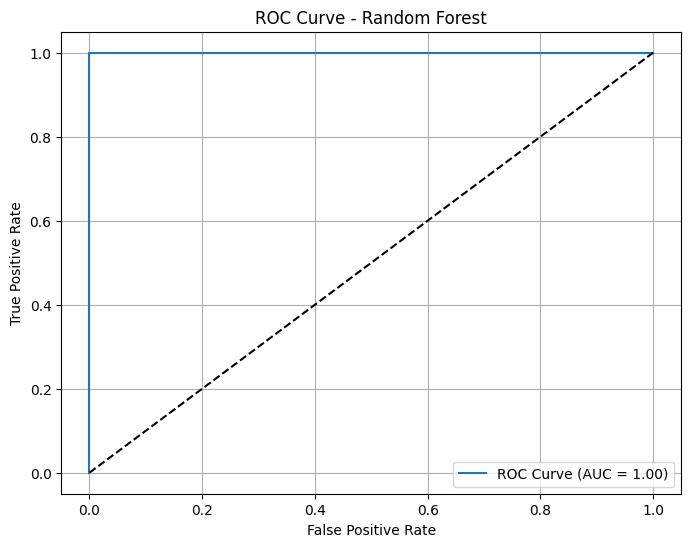

In [27]:
# ROC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_score = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()


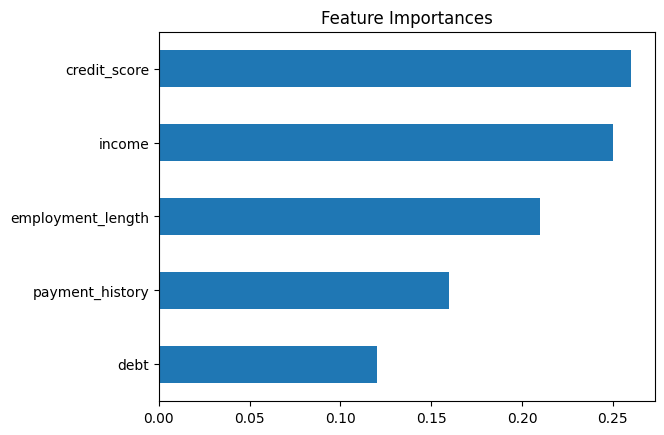

In [28]:
# Feature importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()
